In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import keras
from matplotlib import pyplot as plt
import numpy as np
import gzip
%matplotlib inline
from keras.models import Model
from keras.optimizers import RMSprop
from keras.layers import Input,Dense,Flatten,Dropout,merge,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
from keras.layers.normalization import BatchNormalization
from keras.models import Model,Sequential
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adadelta, RMSprop,SGD,Adam
from keras import regularizers
from keras import backend as K
from keras.utils import to_categorical
# Import
import keras
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2

Using TensorFlow backend.


In [3]:
dataset1 = np.load('/content/drive/My Drive/NN-ProjectC/Project_C1/Training/data_labeled_color.npy', allow_pickle=True)
dataset=dataset1.reshape(1868,224,224,3)
dataset=dataset/255.
Y = np.load('/content/drive/My Drive/NN-ProjectC/Project_C1/Training/data_labeled_labels.npy', allow_pickle=True)
print (Y.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split( dataset,Y, test_size=0.1, random_state=42)

(1868, 1)


In [4]:
print(Y_train.shape)
print(Y_test.shape)
print(X_train.shape)
print(X_test.shape)

(1681, 1)
(187, 1)
(1681, 224, 224, 3)
(187, 224, 224, 3)


In [0]:
# #print(a[2])
# print(dataset1.shape)
# dataset=dataset1.reshape(1868,224,224,3)
# print(dataset.shape)
# dataset=dataset/255.
# print(dataset[1])

#from sklearn.model_selection import train_test_split
#X_train, X_test= train_test_split( x, test_size=0.1, random_state=42)

(1868, 3, 224, 224)
(1868, 224, 224, 3)


In [0]:
# Checkpoints:
from keras.callbacks import ModelCheckpoint, TensorBoard
checkpoints = []
checkpoints.append(ModelCheckpoint('/content/drive/My Drive/NN-ProjectC/Project_C1/Models/checkpoint',
                                   monitor='val_loss', verbose=1, save_best_only=True, 
                                   save_weights_only=False, mode='auto', period=5))
#checkpoints.append(TensorBoard(log_dir='/Checkpoints/logs'))

In [0]:
# Describe the number of classes:
num_class = 6

from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, Dense, Activation, Lambda, Reshape, Flatten
from keras.models import Model
from keras import backend as K

# Custom classifier function:
def classifier_func(x):
    return x+x*K.one_hot(K.argmax(x, axis=1), num_classes=num_class)

In [33]:
# Deep Learning Model:

inputs = Input(shape=(224,224,3))
#Encoder:
conv_1 = Conv2D(32, (3,3), strides=(1,1))(inputs)
act_1 = Activation('relu')(conv_1)
maxpool_1 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(act_1)

conv_2 = Conv2D(64, (3,3), strides=(1,1), padding='same')(maxpool_1)
act_2 = Activation('relu')(conv_2)
maxpool_2 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(act_2)

conv_2 = Conv2D(128, (3,3), strides=(1,1), padding='same')(maxpool_1)
act_2 = Activation('relu')(conv_2)
maxpool_2 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(act_2)
# Output Shape: 6x6x64
    
flat_1 = Flatten()(maxpool_2)

fc_1 = Dense(256)(flat_1)
act_3 = Activation('relu')(fc_1)

fc_2 = Dense(128)(act_3)
act_4 = Activation('relu')(fc_2)

fc_3 = Dense(num_class)(act_4)

act_class = Lambda(classifier_func, output_shape=(num_class,))(fc_3)
# Output Shape: 10

#Decoder:
fc_4 = Dense(128)(act_class)
act_5 = Activation('relu')(fc_4)

fc = Dense(256)(act_5)
act_5 = Activation('relu')(fc)

fc_5 = Dense(387200)(act_5)
act_6 = Activation('relu')(fc_5)
reshape_1 = Reshape((55,55,128))(act_6)

# upsample_1 = UpSampling2D((2, 2))(reshape_1)
# deconv_1 = Conv2DTranspose(128, (3, 3), strides=(1, 1))(upsample_1)
# act_7 = Activation('relu')(deconv_1)

upsample_1 = UpSampling2D((2, 2))(reshape_1)
deconv_1 = Conv2DTranspose(64, (3, 3), strides=(1, 1))(upsample_1)
act_7 = Activation('relu')(deconv_1)

upsample_2 = UpSampling2D((2, 2))(act_7)
deconv_2 = Conv2DTranspose(32, (3, 3), strides=(1, 1))(upsample_2)
act_8 = Activation('relu')(deconv_2)

conv_3 = Conv2D(3, (3, 3), strides=(1, 1))(act_8)
act_9 = Activation('sigmoid')(conv_3)
# Output Shape: 28x28x1

autoencoder = Model(inputs, act_9)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
activation_67 (Activation)   (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 111, 111, 128)     36992     
_________________________________________________________________
activation_69 (Activation)   (None, 111, 111, 128)     0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 55, 55, 128)       0   

In [0]:
# # Deep Learning Model:

# inputs = Input(shape=(224,224,3))
# #Encoder:
# conv_1 = Conv2D(32, (3,3), strides=(1,1))(inputs)
# act_1 = Activation('relu')(conv_1)
# maxpool_1 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(act_1)

# conv_2 = Conv2D(64, (3,3), strides=(1,1), padding='same')(maxpool_1)
# act_2 = Activation('relu')(conv_2)
# maxpool_2 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(act_2)
# # Output Shape: 6x6x64
    
# flat_1 = Flatten()(maxpool_2)

# fc_1 = Dense(256)(flat_1)
# act_3 = Activation('relu')(fc_1)

# fc_2 = Dense(128)(act_3)
# act_4 = Activation('relu')(fc_2)

# fc_3 = Dense(num_class)(act_4)

# act_class = Lambda(classifier_func, output_shape=(num_class,))(fc_3)
# # Output Shape: 10


# autoencoder = Model(inputs, act_class)
# autoencoder.compile(optimizer='adam', loss='categorical_crossentropy')

# autoencoder.summary()

In [36]:
# Training Model:
epochs = 100
batch_size = 8
history=autoencoder.fit(X_train, X_train, batch_size=32, epochs=epochs, validation_data=(X_test, X_test), shuffle=True, callbacks=checkpoints)
autoencoder.save("/content/drive/My Drive/NN-ProjectC/Project_C1/Models/Labeled_colour_autoencoder1.h5")

Train on 1681 samples, validate on 187 samples
Epoch 1/100
1681/1681 [==============================] - 12s 7ms/step - loss: 0.6815 - val_loss: 0.6796
Epoch 2/100
1681/1681 [==============================] - 11s 7ms/step - loss: 0.6699 - val_loss: 0.6695
Epoch 3/100
1681/1681 [==============================] - 11s 7ms/step - loss: 0.6603 - val_loss: 0.6588

Epoch 00003: val_loss did not improve from 0.63726
Epoch 4/100
1681/1681 [==============================] - 11s 7ms/step - loss: 0.6531 - val_loss: 0.6556
Epoch 5/100
1681/1681 [==============================] - 11s 7ms/step - loss: 0.6489 - val_loss: 0.6515
Epoch 6/100
1681/1681 [==============================] - 11s 7ms/step - loss: 0.6462 - val_loss: 0.6497
Epoch 7/100
1681/1681 [==============================] - 11s 7ms/step - loss: 0.6444 - val_loss: 0.6504
Epoch 8/100
1681/1681 [==============================] - 11s 7ms/step - loss: 0.6423 - val_loss: 0.6467

Epoch 00008: val_loss did not improve from 0.63726
Epoch 9/100
1681/

In [0]:

decoded_imgs = autoencoder.predict(X_test[10:20])

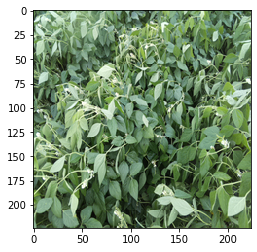

In [39]:
plt.imshow(X_test[10])

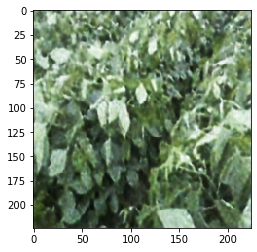

In [40]:
plt.imshow(decoded_imgs[1])

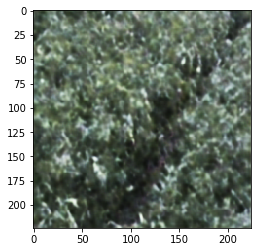

In [21]:
    #need to modify
    
    # ax = plt.subplot(2, 1,1)
for i in range(0,10):    
    plt.imshow(X_test[i+10])
    #plt.gray()
    # ax.get_xaxis().set_visible(False)
    # ax.get_yaxis().set_visible(False)

    # display reconstruction
    # print(decoded_imgs[0])
    # ax = plt.subplot(2, 1,2)
    plt.imshow(decoded_imgs[i])
    #plt.gray()
    # ax.get_xaxis().set_visible(False)
    # ax.get_yaxis().set_visible(False)


In [23]:

# Split autoencoder:
encoder = Model(inputs, act_class)
encoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
activation_11 (Activation)   (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 111, 111, 64)      18496     
_________________________________________________________________
activation_12 (Activation)   (None, 111, 111, 64)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 55, 55, 64)        0   

In [24]:
encode = encoder.predict(X)

class_dict = np.zeros((num_class, num_class))
for i, sample in enumerate(Y):
    class_dict[np.argmax(encode[i], axis=0)][sample] += 1
    
print(class_dict)
    
neuron_class = np.zeros((num_class))
for i in range(num_class):
    neuron_class[i] = np.argmax(class_dict[i], axis=0)

print(neuron_class)

NameError: ignored

Loss: 0.7965
Examples:


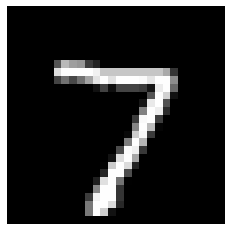

Class: 7 - Model's Output Class: 2.0


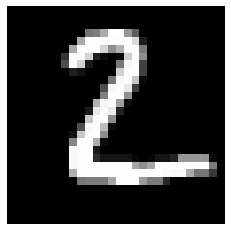

Class: 2 - Model's Output Class: 2.0


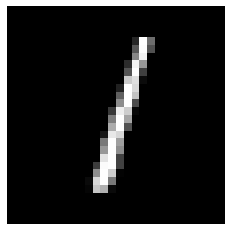

Class: 1 - Model's Output Class: 1.0


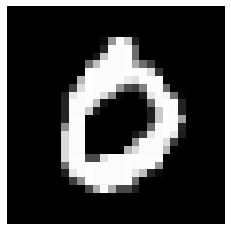

Class: 0 - Model's Output Class: 2.0


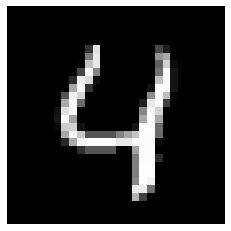

Class: 4 - Model's Output Class: 2.0


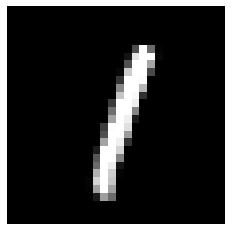

Class: 1 - Model's Output Class: 1.0


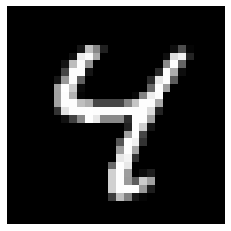

Class: 4 - Model's Output Class: 2.0


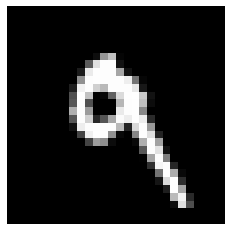

Class: 9 - Model's Output Class: 2.0


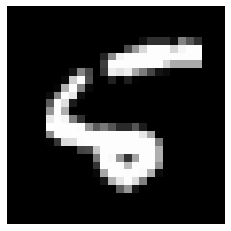

Class: 5 - Model's Output Class: 2.0


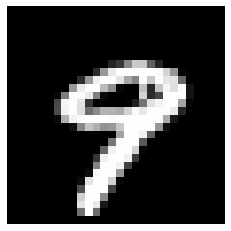

Class: 9 - Model's Output Class: 2.0


In [0]:
encode = encoder.predict(X_test)

predicted = np.argmax(encode, axis=1)
for i, sample in enumerate(predicted):
    predicted[i] = neuron_class[predicted[i]]

comparison = Y_test == predicted
loss = 1 - np.sum(comparison.astype(int))/Y_test.shape[0]

print('Loss:', loss)
print('Examples:')
for i in range(10):
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.show()
    neuron = np.argmax(encode[i], axis=0)
    print('Class:', Y_test[i], '- Model\'s Output Class:', neuron_class[neuron])